In [295]:
import numpy as np
from matplotlib import pyplot as plt
import time

from sklearn.svm import SVC
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

In [296]:
my_sizeNtimes=[]
sK_sizeNtimes=[]
d1=np.random.rand(100,2)
d2=np.random.rand(200,2)
d3=np.random.rand(300,2)
d4=np.random.rand(400,2)
d5=np.random.rand(500,2)
d6=np.random.rand(600,2)
d7=np.random.rand(700,2)
d8=np.random.rand(800,2)

In [297]:
c1=np.random.choice([-1,1],d1.shape[0]).reshape(-1,1)
c2=np.random.choice([-1,1],d2.shape[0]).reshape(-1,1)
c3=np.random.choice([-1,1],d3.shape[0]).reshape(-1,1)
c4=np.random.choice([-1,1],d4.shape[0]).reshape(-1,1)
c5=np.random.choice([-1,1],d5.shape[0]).reshape(-1,1)
c6=np.random.choice([-1,1],d6.shape[0]).reshape(-1,1)
c7=np.random.choice([-1,1],d7.shape[0]).reshape(-1,1)
c8=np.random.choice([-1,1],d8.shape[0]).reshape(-1,1)



In [298]:
# hard-coded SVM
def mySVM(X,y):    
    C = 100
    m,n = X.shape
    Xy = y * X
    H = np.dot(Xy , Xy.T)

    P = cvxopt_matrix(H)
    q = cvxopt_matrix(-np.ones((m, 1)))
    G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
    h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
    A = cvxopt_matrix(y.T*1.0)
    b = cvxopt_matrix(np.zeros(1))
    
    start=time.time()
    sol = cvxopt_solvers.qp(P, q, G, h, A, b)
    end=time.time()

    lambdas = np.array(sol['x'])
    w = np.matmul((y * lambdas).T,X).reshape(-1,1)
    Sv = ((lambdas>0.09999) ).flatten()
    w0 = np.mean(y[Sv] - np.dot(X[Sv], w))
    my_sizeNtimes.append([X.shape[0],(end-start)*10**3])
    return((end-start)*10**3, w, w0 )


In [299]:
#sklearn SVM
def skSvm(X,y):
    starts = time.time()
    model = SVC(C = 100, kernel = 'linear')
    model.fit(X, y.reshape(-1)) 
    ends = time.time()
    sK_sizeNtimes.append([X.shape[0],(ends-starts)*10**3])

    return((ends-starts)*10**3 ,model.coef_, model.intercept_)


In [300]:
mySVM(d1,c1)
skSvm(d1,c1)

mySVM(d2,c2)
skSvm(d2,c2)

mySVM(d3,c3)
skSvm(d3,c3)

mySVM(d4,c4)
skSvm(d4,c4)

mySVM(d5,c5)
skSvm(d5,c5)

mySVM(d6,c6)
skSvm(d6,c6)

mySVM(d7,c7)
skSvm(d7,c7)

mySVM(d8,c8)
skSvm(d8,c8)

     pcost       dcost       gap    pres   dres
 0: -2.5543e+03 -2.0426e+05  2e+05  4e-14  7e-14
 1: -4.9319e+03 -1.2252e+04  7e+03  2e-14  4e-14
 2: -7.8368e+03 -9.2334e+03  1e+03  3e-14  7e-14
 3: -8.2749e+03 -8.7858e+03  5e+02  2e-13  6e-14
 4: -8.4258e+03 -8.6215e+03  2e+02  3e-13  7e-14
 5: -8.4981e+03 -8.5467e+03  5e+01  2e-13  7e-14
 6: -8.5197e+03 -8.5244e+03  5e+00  1e-13  7e-14
 7: -8.5219e+03 -8.5220e+03  1e-01  1e-13  7e-14
 8: -8.5220e+03 -8.5220e+03  1e-03  6e-14  9e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.6686e+03 -2.4519e+05  2e+05  2e-13  1e-13
 1: -1.0747e+04 -2.1913e+04  1e+04  4e-13  1e-13
 2: -1.8170e+04 -2.0554e+04  2e+03  1e-13  2e-13
 3: -1.8780e+04 -1.9467e+04  7e+02  6e-14  2e-13
 4: -1.8919e+04 -1.9202e+04  3e+02  6e-14  2e-13
 5: -1.8993e+04 -1.9088e+04  1e+02  6e-14  2e-13
 6: -1.9030e+04 -1.9038e+04  8e+00  2e-13  2e-13
 7: -1.9034e+04 -1.9034e+04  8e-02  5e-13  2e-13
 8: -1.9034e+04 -1.9034e+04  8e-04  3e-13  2e-1

(0.0, array([[-2.12194706e+00,  1.33140313e-03]]), array([1.07847804]))

In [301]:
sK_sizeNtimes=np.array(sK_sizeNtimes)
my_sizeNtimes=np.array(my_sizeNtimes)

(0.0, 800.0)

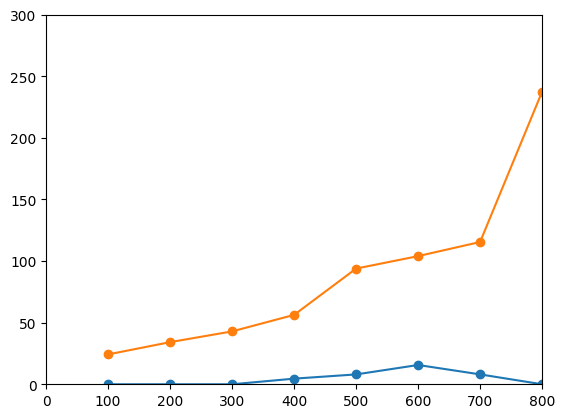

In [306]:
plt.plot(sK_sizeNtimes.T[0], sK_sizeNtimes.T[1],marker='o')
plt.plot(my_sizeNtimes.T[0], my_sizeNtimes.T[1],marker='o')

plt.ylim(0,300)
plt.xlim(0,800)


In [303]:
# what if no optimal solution found? in cvxopt